In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 메타정보가 **결과 지표(체중, BMI, 체지방률, 순수 지방량)**에 어떤 영향을 미치는가?

In [4]:
import sqlite3
import pandas as pd
db_path = "/content/drive/MyDrive/BIO_MEDICAL_PROJECT/obesity_gene_analysis/data/OBESITYGENE_PROJECT.db"

In [5]:
conn = sqlite3.connect(db_path)
SHAP_metadata_df = pd.read_sql_query("""
    SELECT subject_id, treatment, sex, age_yrs, height_cm,
           base_weight_kg, base_bmi_kg_m2, base_body_fat_pct, base_pure_fat_kg
    FROM metadata
    WHERE time_point='at study start'
""", conn, index_col='subject_id')
conn.close()

In [8]:
conn = sqlite3.connect(db_path)
SHAP_weight_bmi_changes_df = pd.read_sql_query("""
    SELECT subject_id, weight_kg_C_A, bmi_C_A, fat_C_A, pure_fat_C_A
    FROM weight_bmi_changes
""", conn, index_col='subject_id')
conn.close()

In [10]:
SHAP_metadata_df.shape

(51, 8)

In [9]:
SHAP_metadata_df

,treatment,sex,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg
subject_id,,,,,,,,
1,very-low-calorie diet,female,46.0,167.0,83.38,29.90,39.9,33.26862
2,very-low-calorie diet,female,45.0,164.0,80.94,30.09,46.7,37.79898
3,very-low-calorie diet,male,52.0,178.5,99.62,31.27,27.2,27.09664
4,very-low-calorie diet,female,41.0,154.0,80.34,33.88,46.5,37.35810
5,very-low-calorie diet,male,56.0,179.0,96.67,30.17,32.9,31.80443
6,low-calorie diet,female,66.0,158.5,82.09,32.68,47.4,38.91066
8,low-calorie diet,female,48.0,165.0,78.25,28.74,46.2,36.15150
9,low-calorie diet,female,53.0,169.5,97.56,33.96,55.0,53.65800
10,low-calorie diet,female,40.0,172.0,100.01,33.81,45.3,45.30453


In [12]:
SHAP_weight_bmi_changes_df.shape

(53, 4)

In [11]:
SHAP_weight_bmi_changes_df

,weight_kg_C_A,bmi_C_A,fat_C_A,pure_fat_C_A
subject_id,,,,
1,-9.59,-3.44,-7.5,-9.36066
2,-9.97,-3.70,-6.2,-9.05613
3,-9.47,-2.97,-6.4,-8.34544
4,-4.91,-2.07,-2.5,-4.16890
5,-12.65,-3.95,-8.9,-11.63963
6,-3.94,-1.57,-2.7,-3.97761
8,-5.66,-2.08,-6.0,-6.97032
9,-9.94,-3.46,-4.5,-9.40990
10,-10.48,-3.55,-4.4,-8.68676


In [13]:
X=SHAP_metadata_df
y=SHAP_weight_bmi_changes_df

In [14]:
# 공통 인덱스 (subject_id) 추출
common_index = X.index.intersection(y.index)

# 공통 인덱스 기준으로 X, y 정렬 및 필터링
X_common = X.loc[common_index]
y_common = y.loc[common_index]

In [15]:
print(X_common.shape)
print(y_common.shape)
print(X_common.index.equals(y_common.index))  # True여야 안전

(51, 8)
(51, 4)
True


In [16]:
X_common

,treatment,sex,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg
subject_id,,,,,,,,
1,very-low-calorie diet,female,46.0,167.0,83.38,29.90,39.9,33.26862
2,very-low-calorie diet,female,45.0,164.0,80.94,30.09,46.7,37.79898
3,very-low-calorie diet,male,52.0,178.5,99.62,31.27,27.2,27.09664
4,very-low-calorie diet,female,41.0,154.0,80.34,33.88,46.5,37.35810
5,very-low-calorie diet,male,56.0,179.0,96.67,30.17,32.9,31.80443
6,low-calorie diet,female,66.0,158.5,82.09,32.68,47.4,38.91066
8,low-calorie diet,female,48.0,165.0,78.25,28.74,46.2,36.15150
9,low-calorie diet,female,53.0,169.5,97.56,33.96,55.0,53.65800
10,low-calorie diet,female,40.0,172.0,100.01,33.81,45.3,45.30453


In [17]:
y_common

,weight_kg_C_A,bmi_C_A,fat_C_A,pure_fat_C_A
subject_id,,,,
1,-9.59,-3.44,-7.5,-9.36066
2,-9.97,-3.70,-6.2,-9.05613
3,-9.47,-2.97,-6.4,-8.34544
4,-4.91,-2.07,-2.5,-4.16890
5,-12.65,-3.95,-8.9,-11.63963
6,-3.94,-1.57,-2.7,-3.97761
8,-5.66,-2.08,-6.0,-6.97032
9,-9.94,-3.46,-4.5,-9.40990
10,-10.48,-3.55,-4.4,-8.68676


In [22]:
# X_common과 y_common을 좌우로 합치기 (subject_id 기준)
merged_df = pd.concat([X_common, y_common], axis=1)

# 결측치가 있는 행 제거
merged_clean = merged_df.dropna()

# 다시 X, y로 분리
X_clean = merged_clean[X.columns]
y_clean = merged_clean[y.columns]

In [19]:
print(X_clean.shape)
print(y_clean.shape)

(47, 8)
(47, 4)


In [23]:
X_encoded = pd.get_dummies(X_clean, columns=['treatment', 'sex'], drop_first=True)

In [24]:
X_encoded

,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg,treatment_very-low-calorie diet,sex_male
subject_id,,,,,,,,
1,46.0,167.0,83.38,29.90,39.9,33.26862,True,False
2,45.0,164.0,80.94,30.09,46.7,37.79898,True,False
3,52.0,178.5,99.62,31.27,27.2,27.09664,True,True
4,41.0,154.0,80.34,33.88,46.5,37.35810,True,False
5,56.0,179.0,96.67,30.17,32.9,31.80443,True,True
6,66.0,158.5,82.09,32.68,47.4,38.91066,False,False
8,48.0,165.0,78.25,28.74,46.2,36.15150,False,False
9,53.0,169.5,97.56,33.96,55.0,53.65800,False,False
10,40.0,172.0,100.01,33.81,45.3,45.30453,False,False


In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import shap

# 모델 학습
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_encoded, y_clean)

# SHAP 계산
body_shap_dict = {}
for i, label in enumerate(y_clean.columns):
    explainer = shap.TreeExplainer(model.estimators_[i])
    shap_values = explainer.shap_values(X_encoded)
    mean_abs_shap = np.abs(shap_values).mean(axis=0)
    body_shap_dict[label] = mean_abs_shap

# DataFrame 생성
body_feature_shap_df = pd.DataFrame(body_shap_dict, index=X_encoded.columns).T

In [28]:
body_feature_shap_df

,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg,treatment_very-low-calorie diet,sex_male
weight_kg_C_A,0.121156,0.235374,0.857371,0.236503,0.382862,0.302662,0.194327,0.009612
bmi_C_A,0.066692,0.074967,0.163945,0.066222,0.077505,0.116892,0.052872,0.004917
fat_C_A,0.167166,0.175169,0.173430,0.309838,0.947335,0.374721,0.038145,0.008601
pure_fat_C_A,0.169406,0.257525,0.885082,0.412190,0.430802,0.177697,0.043564,0.017639


In [29]:
# 평균과 표준편차 계산
mean_importance = body_feature_shap_df.mean(axis=0)
std_importance = body_feature_shap_df.std(axis=0)

# 중요도 기준 정렬
sorted_features = mean_importance.sort_values(ascending=False).index
mean_sorted = mean_importance[sorted_features]
std_sorted = std_importance[sorted_features]

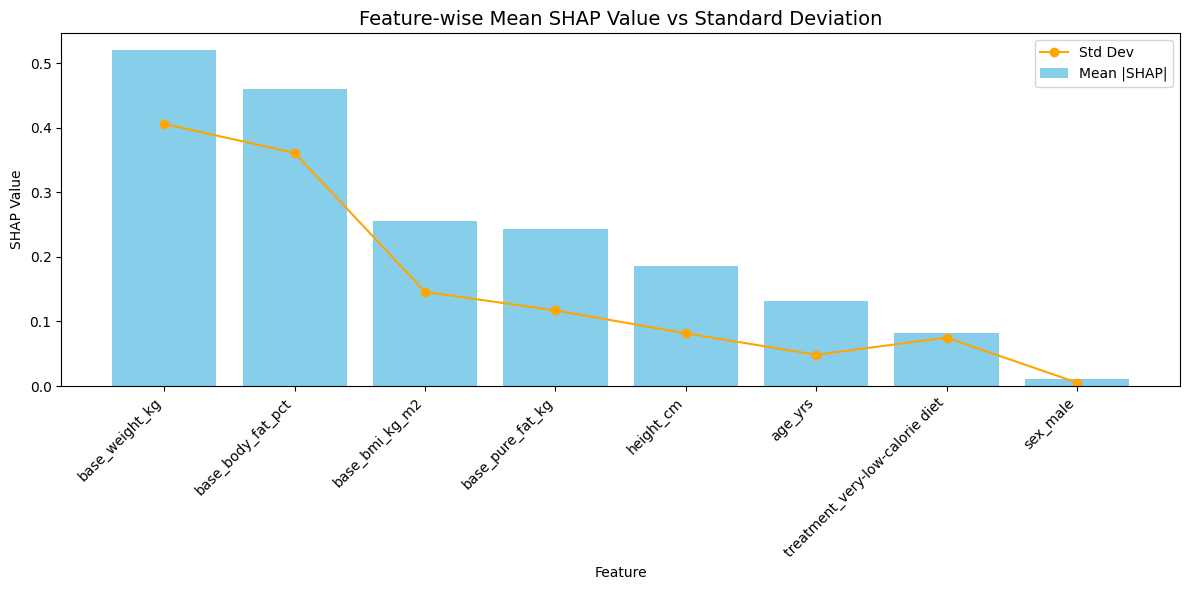

In [30]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.bar(sorted_features, mean_sorted, color='skyblue', label='Mean |SHAP|')
ax.plot(sorted_features, std_sorted, color='orange', marker='o', label='Std Dev')

plt.title("Feature-wise Mean SHAP Value vs Standard Deviation", fontsize=14)
plt.ylabel("SHAP Value")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
from scipy.stats import zscore
import pandas as pd

# z-score 계산
# axis=1: 각 "행"(즉, 결과지표 또는 유전자별)을 기준으로,
#           해당 결과지표에 대해 어떤 feature가 상대적으로 더 민감한지를 확인
#           → "행 기준 표준화" = 각 행의 평균이 0, 표준편차가 1로 맞춰짐
z_array_1 = zscore(body_feature_shap_df, axis=1)

# axis=0: 각 "열"(즉, feature)을 기준으로,
#           해당 feature가 어떤 결과지표에서 상대적으로 더 중요하게 작용하는지를 확인
#           → "열 기준 표준화" = 각 열의 평균이 0, 표준편차가 1로 맞춰짐
z_array_0 = zscore(body_feature_shap_df, axis=0)

# DataFrame으로 변환
body_shap_zscore_df_1 = pd.DataFrame(z_array_1, index=body_feature_shap_df.index, columns=body_feature_shap_df.columns)
body_shap_zscore_df_0 = pd.DataFrame(z_array_0, index=body_feature_shap_df.index, columns=body_feature_shap_df.columns)

In [34]:
# 결과지표별로 가장 민감한 Feature
topk_metric_to_feature = {}
for label in body_shap_zscore_df_1.index:
    top_feats = body_shap_zscore_df_1.loc[label].sort_values(ascending=False)
    topk_metric_to_feature[label] = top_feats  # 전체 저장

In [35]:
print("결과지표별 Top-3 민감 Feature:")
for label, feats in topk_metric_to_feature.items():
    top3_feats = feats.head(3)
    print(f"{label}: {list(top3_feats.index)} (z: {top3_feats.values.round(2)})")

결과지표별 Top-3 민감 Feature:
weight_kg_C_A: ['base_weight_kg', 'base_body_fat_pct', 'base_pure_fat_kg'] (z: [2.37 0.38 0.04])
bmi_C_A: ['base_weight_kg', 'base_pure_fat_kg', 'base_body_fat_pct'] (z: [ 1.98  0.89 -0.01])
fat_C_A: ['base_body_fat_pct', 'base_pure_fat_kg', 'base_bmi_kg_m2'] (z: [2.41 0.36 0.13])
pure_fat_C_A: ['base_weight_kg', 'base_body_fat_pct', 'base_bmi_kg_m2'] (z: [2.23 0.5  0.43])


In [37]:
topk_metric_to_feature

{'weight_kg_C_A': base_weight_kg                     2.374480
 base_body_fat_pct                  0.379902
 base_pure_fat_kg                   0.042784
 base_bmi_kg_m2                    -0.235309
 height_cm                         -0.240056
 treatment_very-low-calorie diet   -0.412595
 age_yrs                           -0.720168
 sex_male                          -1.189039
 Name: weight_kg_C_A, dtype: float64,
 'bmi_C_A': base_weight_kg                     1.975083
 base_pure_fat_kg                   0.893744
 base_body_fat_pct                 -0.011420
 height_cm                         -0.069734
 age_yrs                           -0.259900
 base_bmi_kg_m2                    -0.270704
 treatment_very-low-calorie diet   -0.577504
 sex_male                          -1.679565
 Name: bmi_C_A, dtype: float64,
 'fat_C_A': base_body_fat_pct                  2.413395
 base_pure_fat_kg                   0.360092
 base_bmi_kg_m2                     0.127433
 height_cm                         -

In [36]:
# Feature별로 가장 민감한 결과지표
topk_feature_to_metric = {}
for feat in body_shap_zscore_df_0.columns:
    top_labels = body_shap_zscore_df_0[feat].sort_values(ascending=False)
    topk_feature_to_metric[feat] = top_labels  # 전체 저장

print("\nFeature별 Top-3 민감 결과지표:")
for feat, labels in topk_feature_to_metric.items():
    top3_labels = labels.head(3)
    print(f"{feat}: {list(top3_labels.index)} (z: {top3_labels.values.round(2)})")


Feature별 Top-3 민감 결과지표:
age_yrs: ['pure_fat_C_A', 'fat_C_A', 'weight_kg_C_A'] (z: [ 0.91  0.86 -0.24])
height_cm: ['pure_fat_C_A', 'weight_kg_C_A', 'fat_C_A'] (z: [ 1.01  0.7  -0.15])
base_weight_kg: ['pure_fat_C_A', 'weight_kg_C_A', 'fat_C_A'] (z: [ 1.04  0.96 -0.99])
base_bmi_kg_m2: ['pure_fat_C_A', 'fat_C_A', 'weight_kg_C_A'] (z: [ 1.24  0.43 -0.16])
base_body_fat_pct: ['fat_C_A', 'pure_fat_C_A', 'weight_kg_C_A'] (z: [ 1.56 -0.09 -0.25])
base_pure_fat_kg: ['fat_C_A', 'weight_kg_C_A', 'pure_fat_C_A'] (z: [ 1.3   0.59 -0.64])
treatment_very-low-calorie diet: ['weight_kg_C_A', 'bmi_C_A', 'pure_fat_C_A'] (z: [ 1.73 -0.45 -0.6 ])
sex_male: ['pure_fat_C_A', 'weight_kg_C_A', 'fat_C_A'] (z: [ 1.6  -0.13 -0.34])


In [38]:
topk_feature_to_metric

{'age_yrs': pure_fat_C_A     0.914564
 fat_C_A          0.861085
 weight_kg_C_A   -0.237578
 bmi_C_A         -1.538071
 Name: age_yrs, dtype: float64,
 'height_cm': pure_fat_C_A     1.014954
 weight_kg_C_A    0.701682
 fat_C_A         -0.149766
 bmi_C_A         -1.566870
 Name: height_cm, dtype: float64,
 'base_weight_kg': pure_fat_C_A     1.038993
 weight_kg_C_A    0.960138
 fat_C_A         -0.986071
 bmi_C_A         -1.013060
 Name: base_weight_kg, dtype: float64,
 'base_bmi_kg_m2': pure_fat_C_A     1.236303
 fat_C_A          0.425173
 weight_kg_C_A   -0.156003
 bmi_C_A         -1.505472
 Name: base_bmi_kg_m2, dtype: float64,
 'base_body_fat_pct': fat_C_A          1.560719
 pure_fat_C_A    -0.092240
 weight_kg_C_A   -0.245653
 bmi_C_A         -1.222826
 Name: base_body_fat_pct, dtype: float64,
 'base_pure_fat_kg': fat_C_A          1.299887
 weight_kg_C_A    0.588808
 pure_fat_C_A    -0.644335
 bmi_C_A         -1.244360
 Name: base_pure_fat_kg, dtype: float64,
 'treatment_very-low-cal

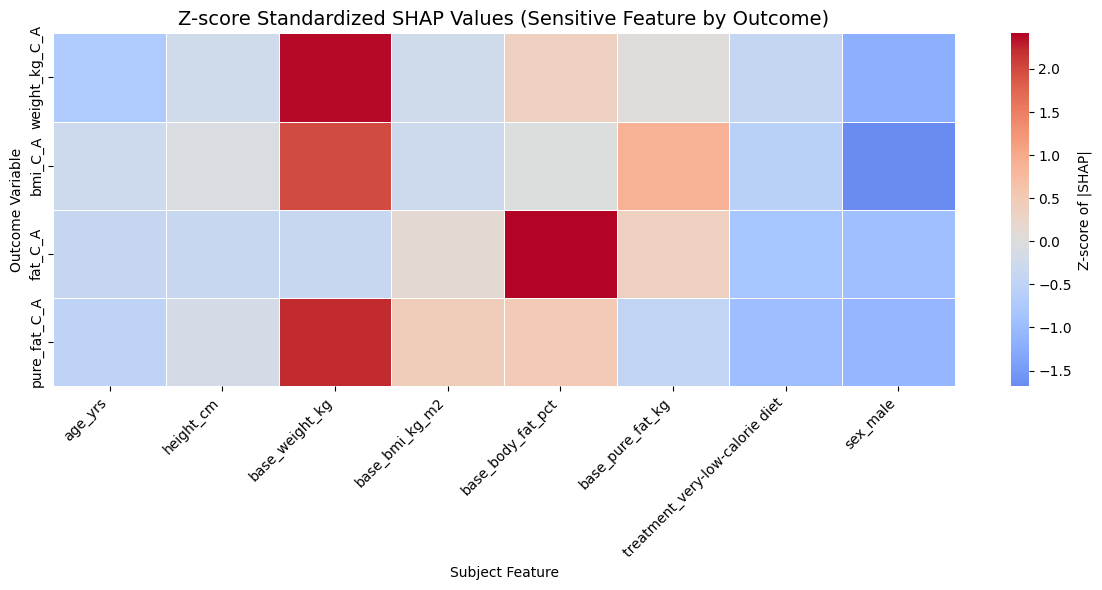

In [39]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(body_shap_zscore_df_1, cmap='coolwarm', center=0, annot=False, fmt=".2f",
            linewidths=0.5, cbar_kws={'label': 'Z-score of |SHAP|'})

plt.title("Z-score Standardized SHAP Values (Sensitive Feature by Outcome)", fontsize=14)
plt.xlabel("Subject Feature")
plt.ylabel("Outcome Variable")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 메타정보 feature에 대한 결과지표별 SHAP벡터 PCA분석

결과지표가 4개밖에 없어서 결과가 그렇게 유의미하다고는 볼 수 없다고 생각.

In [40]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA (2D로 축소)
pca = PCA(n_components=2)
outcome_pca = pca.fit_transform(body_feature_shap_df)

# KMeans (3개 군집으로 가정)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(outcome_pca)

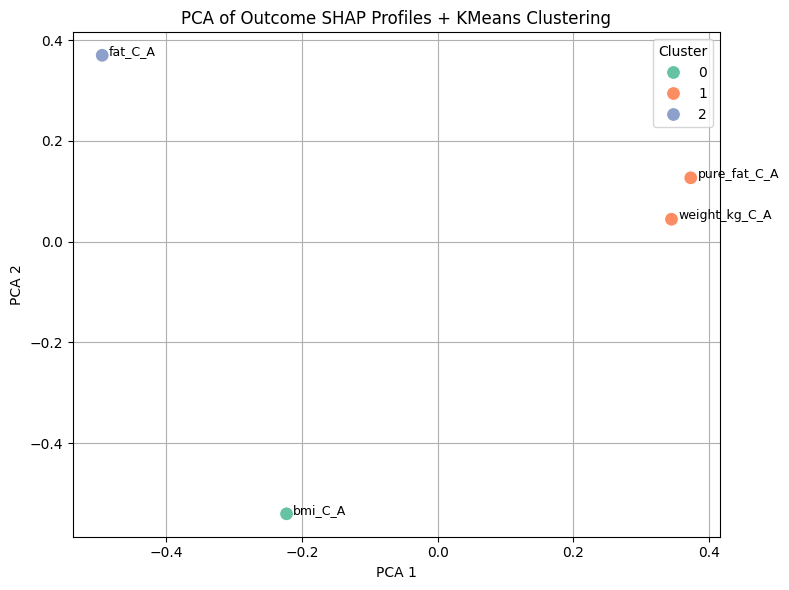

In [41]:
# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=outcome_pca[:, 0], y=outcome_pca[:, 1],
                hue=clusters, palette="Set2", s=100)

# 결과지표 이름 라벨링
for i, label in enumerate(body_feature_shap_df.index):
    plt.text(outcome_pca[i, 0] + 0.01, outcome_pca[i, 1], label, fontsize=9)

plt.title("PCA of Outcome SHAP Profiles + KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()